In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

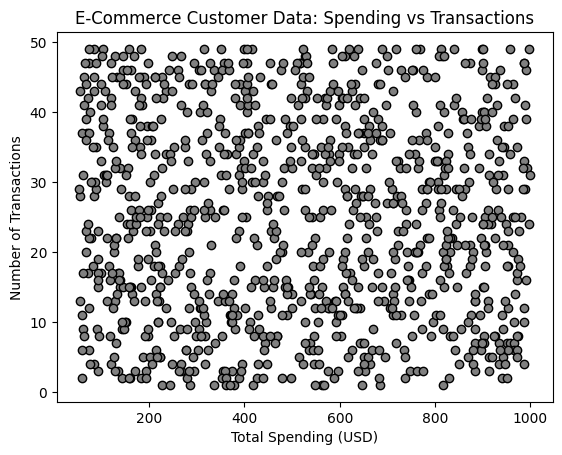

In [2]:
np.random.seed(42)

# Let's assume we have two main features for customers:
# 1. Total spending (USD)
# 2. Number of transactions

# Simulating data for 1000 customers
customer_spending = np.random.uniform(50, 1000, 1000)  # Total spending between $50 and $1000
num_transactions = np.random.randint(1, 50, 1000)      # Number of transactions between 1 and 50

X = np.column_stack((customer_spending, num_transactions))

plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolor='k')
plt.title("E-Commerce Customer Data: Spending vs Transactions")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.show()


In [3]:
# Range of k values
k_values = range(2, 11)
inertia = []
silhouette_avg_list = []

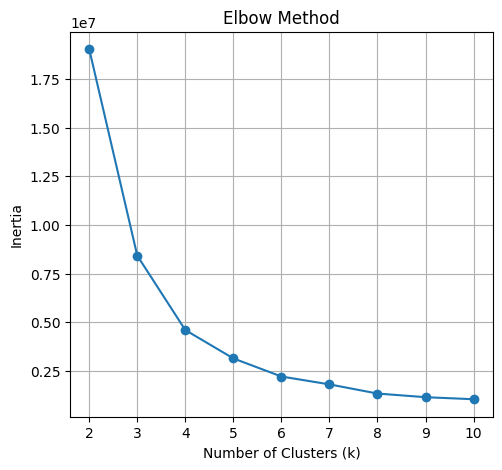

In [4]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

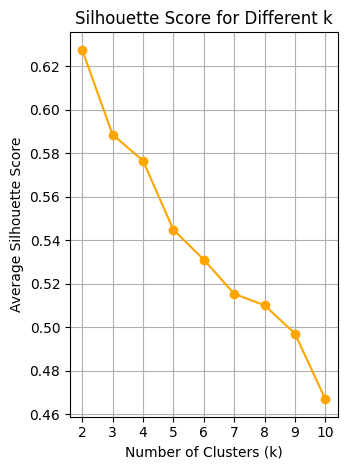

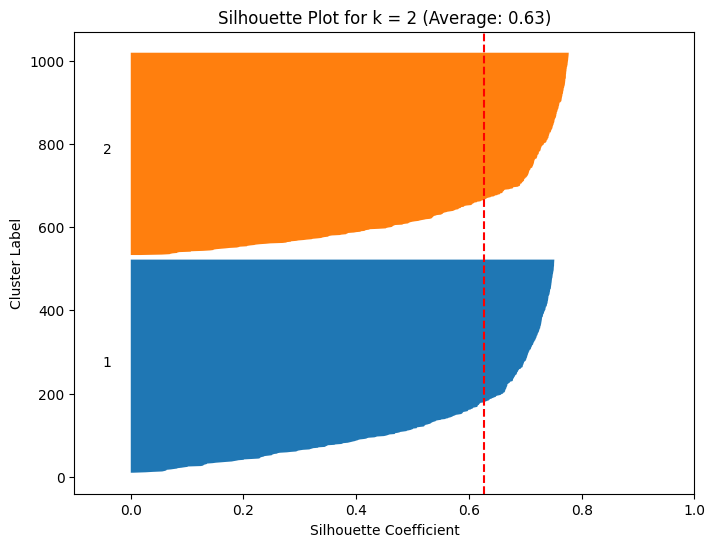

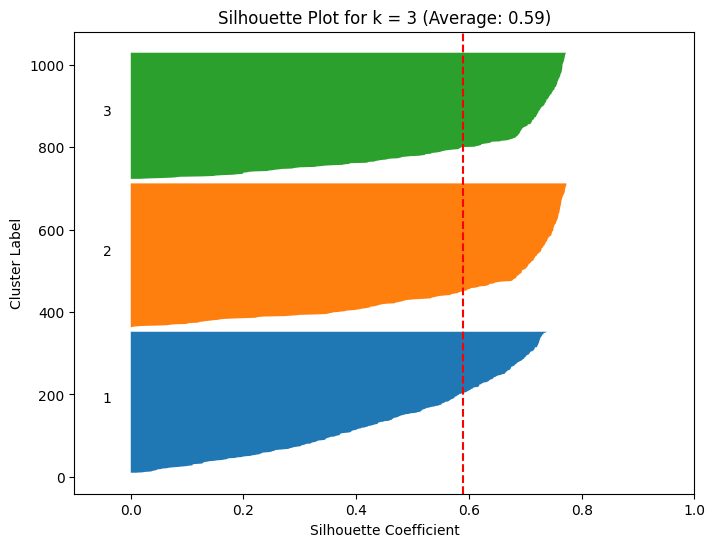

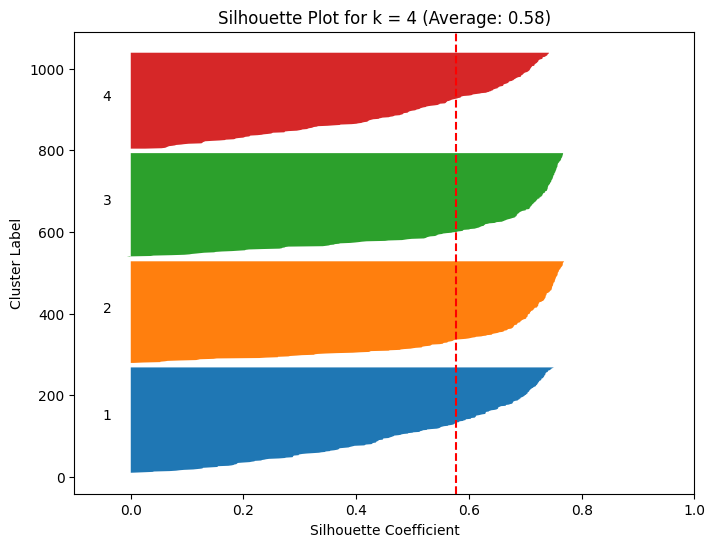

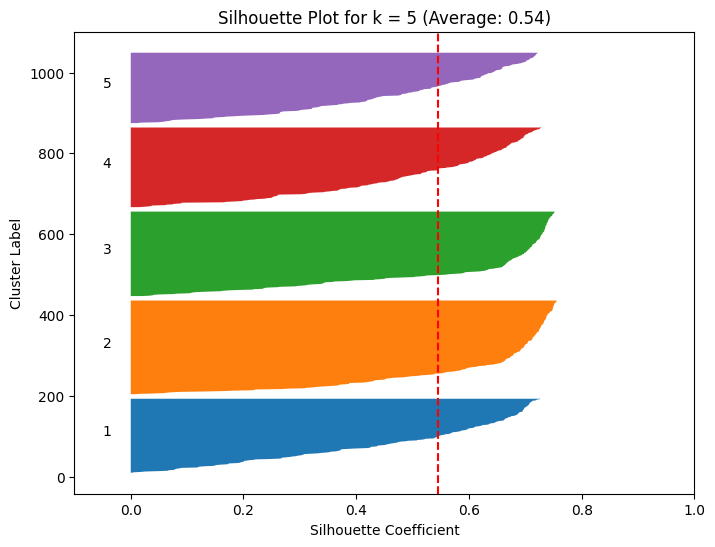

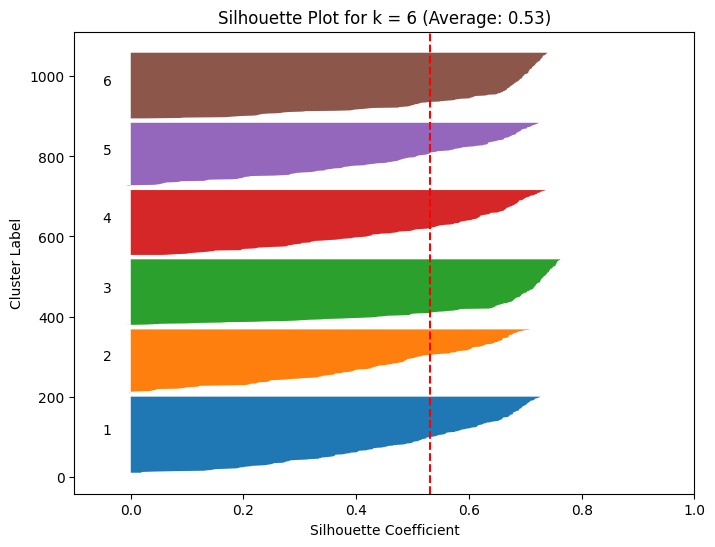

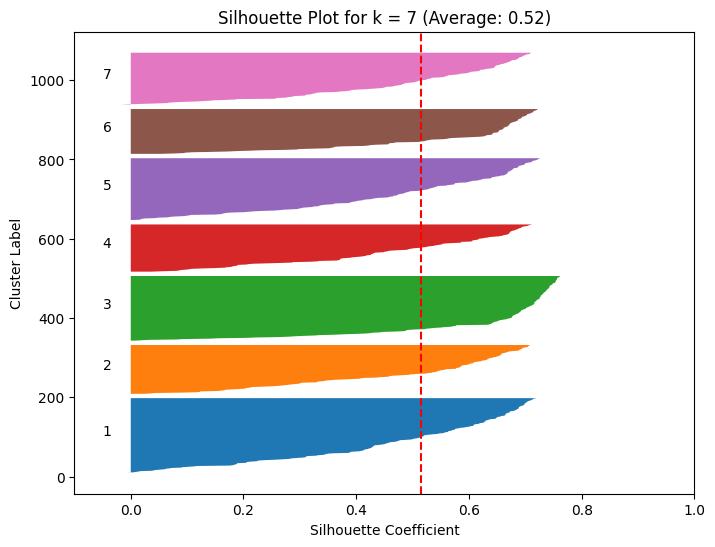

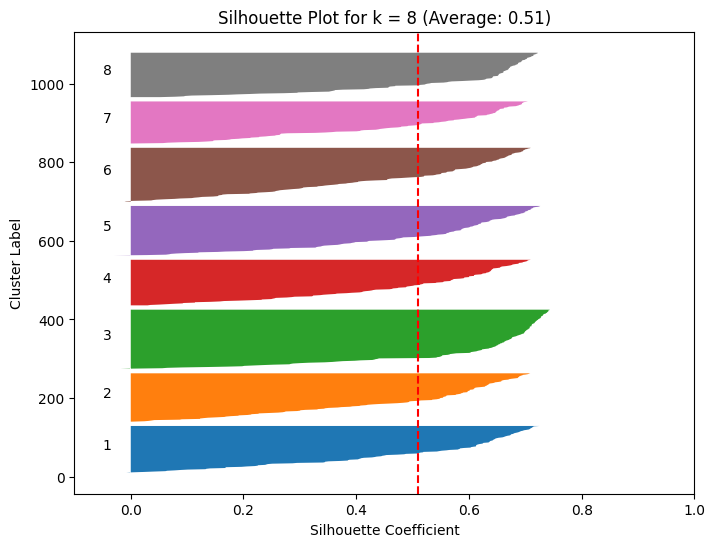

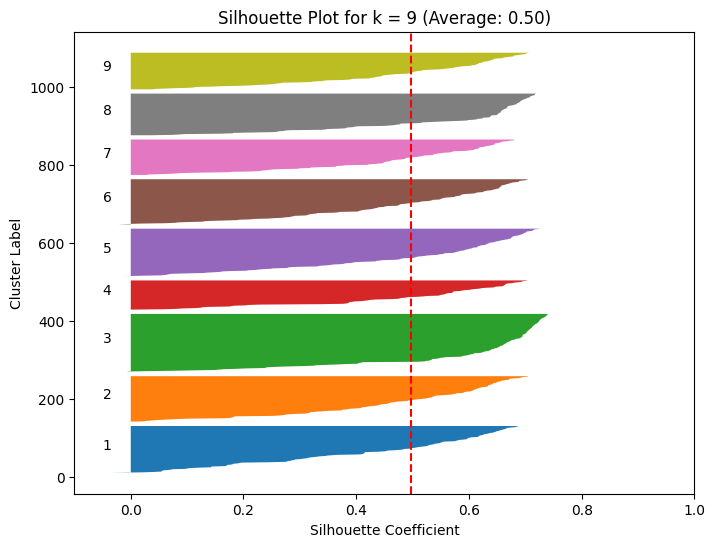

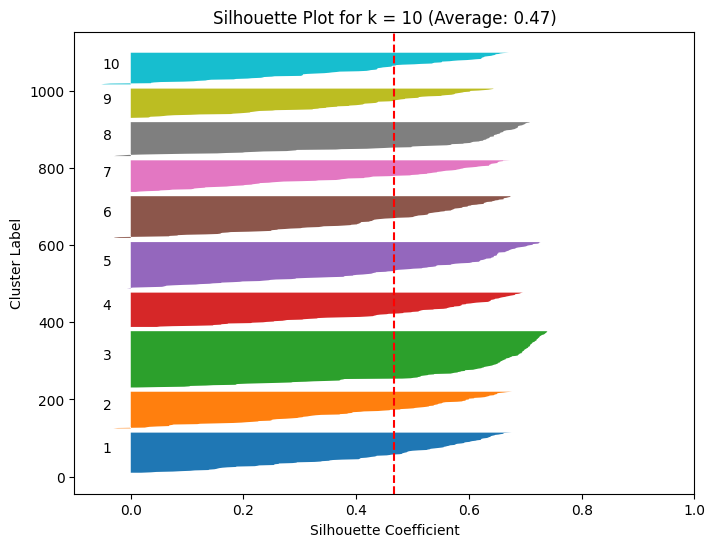

In [5]:
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_avg_list, marker='o', color='orange')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    silhouette_avg = silhouette_score(X, cluster_labels)

    plt.figure(figsize=(8, 6))
    plt.title(f'Silhouette Plot for k = {k} (Average: {silhouette_avg:.2f})')
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
        plt.text(-0.05, (y_lower + y_upper) / 2, str(i + 1))
        y_lower = y_upper + 10

    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster Label')
    plt.axvline(x=silhouette_avg, color='red', linestyle='--')
    plt.show()